In [1]:
import tweepy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from googletrans import Translator
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
import matplotlib.pyplot as plt
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alvin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alvin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
data1 = pd.read_excel('Dataset/sepatu1.xlsx')
data2 = pd.read_excel('Dataset/sepatu4.xlsx')
merged_data = pd.concat([data1, data2], ignore_index=True)
print(merged_data)

     Unnamed: 0  Unnamed: 1                 Author                 Date  \
0             1         NaN         dewimiranti060  2021-01-15 10:41:17   
1             2         NaN                a*****a  2021-01-15 11:37:32   
2             3         NaN                anin.17  2021-01-15 14:03:50   
3             4         NaN                n*****a  2021-01-16 02:37:18   
4             5         NaN                t*****1  2021-01-17 11:35:04   
..          ...         ...                    ...                  ...   
235         116         NaN                e*****8  2023-12-05 03:05:38   
236         117         NaN                f*****z  2023-12-05 10:19:48   
237         118         NaN                e*****2  2023-12-06 03:13:14   
238         119         NaN  nurfaisahnurfaisah539  2023-12-06 07:39:20   
239         120         NaN                lyn0710  2023-12-06 09:41:37   

     Rating  Rating Delivery Service  Rating Product Quality  \
0         5                        

In [3]:
kolom_dihapus = ['Unnamed: 0', 'Unnamed: 1', 'Date', 'Rating', 'Rating Delivery Service', 'Rating Product Quality', 'Rating Seller Service', 'Version', 'Oversea Shopping', 'Region', 'Picture included', 'Photos',	'Videos',	'Profile Url',	'Review Url',	'Unnamed: 17',	'Unnamed: 18',	'Unnamed: 19',	'(view source)']  # Kolom-kolom yang ingin dihapus
for kolom in kolom_dihapus:
    del merged_data[kolom]

merged_data

,Author,Review
0,dewimiranti060,Pengiriman cpt \nKualitas gak perlu di ragukan...
1,a*****a,Respon penjual baiiik. Pengiriman cepat. Worth...
2,anin.17,"Bagus,nyaman,enteng,packing dus.\nPengemasan d..."
3,n*****a,"bagus sepatunyaa \ntapi kerdusnya penyok, sepa..."
4,t*****1,Sepatu kedua dr Aerostreet. Ukuran sepatu sesu...
...,...,...
235,e*****8,"Warna:mocca\nTampilan:baik\n\nSepatunya bagus,..."
236,f*****z,Produk sudah sampai dengan baik. Packaging rap...
237,e*****2,Warna:mocca\n\nBenang jahitan ada yg belum kep...
238,nurfaisahnurfaisah539,Warna:sesuai gambar\nTampilan:baik\n\nBarangny...


In [4]:
# nltk.download('punkt')
# nltk.download('stopwords')
# Preprocessing
def preprocessing(docText):
    # case folding
    text = docText.lower()
    
    # Clean Text
    text = re.sub(r"@[\w]*", "", text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub("rt", "", text)
    text = re.sub("yg", "", text)
    text = text.strip()

    # Translate to English
    translator = Translator()
    text_en = translator.translate(text, dest='en').text

    # Tokenize
    tokens = word_tokenize(text)
    
    # Stop Words
    stopWord = set(stopwords.words('english'))
    listWords = []
    for t in tokens:
        if t not in stopWord:
            listWords.append(t)
    
    
    # Stemming
    listWordAfterStemp = []
    for te in listWords:
        stemmingText = stemmer.stem(te)
        deleteExceptString = re.sub(r"[^a-z]", "", stemmingText)
        listWordAfterStemp.append(deleteExceptString)
    
    dataListWords = ' '.join(listWordAfterStemp)
    return dataListWords

merged_data['preprocessing_result'] = merged_data['Review'].apply(preprocessing)
merged_data

,Author,Review,preprocessing_result
0,dewimiranti060,Pengiriman cpt \nKualitas gak perlu di ragukan...,kirim cpt kualitas gak perlu di ragu lagi wo p...
1,a*****a,Respon penjual baiiik. Pengiriman cepat. Worth...,respon jual baiiik kirim cepat woh banget un...
2,anin.17,"Bagus,nyaman,enteng,packing dus.\nPengemasan d...",bagus nyaman enteng packing dus emas dan k...
3,n*****a,"bagus sepatunyaa \ntapi kerdusnya penyok, sepa...",bagus sepatunyaa tapi kerdusnya penyok sepatu...
4,t*****1,Sepatu kedua dr Aerostreet. Ukuran sepatu sesu...,sepatu dua dr aerostreet ukur sepatu sesuai ...
...,...,...,...
235,e*****8,"Warna:mocca\nTampilan:baik\n\nSepatunya bagus,...",warna mocca tampil baik sepatu bagus pas di...
236,f*****z,Produk sudah sampai dengan baik. Packaging rap...,produk sudah sampai dengan baik packaging rap...
237,e*****2,Warna:mocca\n\nBenang jahitan ada yg belum kep...,warna mocca benang jahit ada belum potong ga...
238,nurfaisahnurfaisah539,Warna:sesuai gambar\nTampilan:baik\n\nBarangny...,warna sesuai gambar tampil baik barang sesua...


In [5]:
merged_data.sort_values("preprocessing_result", inplace=True)
merged_data

,Author,Review,preprocessing_result
68,d*****i,"ada noda dikit but it's ok g msalah,trlepas dr...",ada noda dikit s ok g msalah trlepas dri itu ...
151,elaadrea,Aerostreet emg ga ada duanya kualitas bagus ha...,aerostreet emg ga ada dua kualitas bagus harga...
14,yogirifazhul,Ah mantap.. dah lama incer yang satu ini.. ker...,ah mantap dah lama incer yang satu ini keren...
62,muhammadabrar046,Alhamdulilah barang nya sudah sampai dengan ba...,alhamdulilah barang nya sudah sampai dengan ba...
33,o*****1,Alhamdulillah akhirnya datang juga sepatunya. ...,alhamdulillah akhir datang juga sepatu moga n...
...,...,...,...
136,nooyaantul,Warna:Sesuai gambar\nTampilan:Bagus\n\nSebenar...,warna sesuai gambar tampil bagus benar ini s...
238,nurfaisahnurfaisah539,Warna:sesuai gambar\nTampilan:baik\n\nBarangny...,warna sesuai gambar tampil baik barang sesua...
110,fajar.sby,Warna:sesuai\nTampilan:oke\n\nbarang baik dan ...,warna sesuai tampil oke barang baik dan kual...
79,kreshnayudogeovanin,WORTH IT \nPengiriman cepat ✔️\nHarga terjangk...,woh kirim cepat harga jangkau sesuai dengan ...


In [6]:
def getPolarity(text):
    analysis = TextBlob(text)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
        
    return analysis.sentiment.polarity

merged_data['polarity'] = merged_data['preprocessing_result'].apply(getPolarity)
merged_data

'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' ob

,Author,Review,preprocessing_result,polarity
68,d*****i,"ada noda dikit but it's ok g msalah,trlepas dr...",ada noda dikit s ok g msalah trlepas dri itu ...,0.50
151,elaadrea,Aerostreet emg ga ada duanya kualitas bagus ha...,aerostreet emg ga ada dua kualitas bagus harga...,0.25
14,yogirifazhul,Ah mantap.. dah lama incer yang satu ini.. ker...,ah mantap dah lama incer yang satu ini keren...,0.00
62,muhammadabrar046,Alhamdulilah barang nya sudah sampai dengan ba...,alhamdulilah barang nya sudah sampai dengan ba...,0.00
33,o*****1,Alhamdulillah akhirnya datang juga sepatunya. ...,alhamdulillah akhir datang juga sepatu moga n...,0.00
...,...,...,...,...
136,nooyaantul,Warna:Sesuai gambar\nTampilan:Bagus\n\nSebenar...,warna sesuai gambar tampil bagus benar ini s...,0.00
238,nurfaisahnurfaisah539,Warna:sesuai gambar\nTampilan:baik\n\nBarangny...,warna sesuai gambar tampil baik barang sesua...,0.00
110,fajar.sby,Warna:sesuai\nTampilan:oke\n\nbarang baik dan ...,warna sesuai tampil oke barang baik dan kual...,0.00
79,kreshnayudogeovanin,WORTH IT \nPengiriman cepat ✔️\nHarga terjangk...,woh kirim cepat harga jangkau sesuai dengan ...,0.00


In [7]:
def getSubjectivity(text):
    analysis = TextBlob(text)
    try:
        analysis = analysis.translate(to="en")
    except Exception as e:
        print(e)
        
    return analysis.sentiment.subjectivity

merged_data['subjectivity'] = merged_data['preprocessing_result'].apply(getSubjectivity)
merged_data

'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' object has no attribute 'translate'
'TextBlob' ob

,Author,Review,preprocessing_result,polarity,subjectivity
68,d*****i,"ada noda dikit but it's ok g msalah,trlepas dr...",ada noda dikit s ok g msalah trlepas dri itu ...,0.50,0.50
151,elaadrea,Aerostreet emg ga ada duanya kualitas bagus ha...,aerostreet emg ga ada dua kualitas bagus harga...,0.25,0.25
14,yogirifazhul,Ah mantap.. dah lama incer yang satu ini.. ker...,ah mantap dah lama incer yang satu ini keren...,0.00,0.00
62,muhammadabrar046,Alhamdulilah barang nya sudah sampai dengan ba...,alhamdulilah barang nya sudah sampai dengan ba...,0.00,0.00
33,o*****1,Alhamdulillah akhirnya datang juga sepatunya. ...,alhamdulillah akhir datang juga sepatu moga n...,0.00,0.00
...,...,...,...,...,...
136,nooyaantul,Warna:Sesuai gambar\nTampilan:Bagus\n\nSebenar...,warna sesuai gambar tampil bagus benar ini s...,0.00,0.00
238,nurfaisahnurfaisah539,Warna:sesuai gambar\nTampilan:baik\n\nBarangny...,warna sesuai gambar tampil baik barang sesua...,0.00,0.00
110,fajar.sby,Warna:sesuai\nTampilan:oke\n\nbarang baik dan ...,warna sesuai tampil oke barang baik dan kual...,0.00,0.00
79,kreshnayudogeovanin,WORTH IT \nPengiriman cepat ✔️\nHarga terjangk...,woh kirim cepat harga jangkau sesuai dengan ...,0.00,0.00


In [8]:
def getClassification(val):
    if val < 0:
        return 'negatif'
    elif val == 0:
        return 'netral'
    else:
        return 'positif'
merged_data['sentimen'] = merged_data['polarity'].apply(getClassification)
merged_data

,Author,Review,preprocessing_result,polarity,subjectivity,sentimen
68,d*****i,"ada noda dikit but it's ok g msalah,trlepas dr...",ada noda dikit s ok g msalah trlepas dri itu ...,0.50,0.50,positif
151,elaadrea,Aerostreet emg ga ada duanya kualitas bagus ha...,aerostreet emg ga ada dua kualitas bagus harga...,0.25,0.25,positif
14,yogirifazhul,Ah mantap.. dah lama incer yang satu ini.. ker...,ah mantap dah lama incer yang satu ini keren...,0.00,0.00,netral
62,muhammadabrar046,Alhamdulilah barang nya sudah sampai dengan ba...,alhamdulilah barang nya sudah sampai dengan ba...,0.00,0.00,netral
33,o*****1,Alhamdulillah akhirnya datang juga sepatunya. ...,alhamdulillah akhir datang juga sepatu moga n...,0.00,0.00,netral
...,...,...,...,...,...,...
136,nooyaantul,Warna:Sesuai gambar\nTampilan:Bagus\n\nSebenar...,warna sesuai gambar tampil bagus benar ini s...,0.00,0.00,netral
238,nurfaisahnurfaisah539,Warna:sesuai gambar\nTampilan:baik\n\nBarangny...,warna sesuai gambar tampil baik barang sesua...,0.00,0.00,netral
110,fajar.sby,Warna:sesuai\nTampilan:oke\n\nbarang baik dan ...,warna sesuai tampil oke barang baik dan kual...,0.00,0.00,netral
79,kreshnayudogeovanin,WORTH IT \nPengiriman cepat ✔️\nHarga terjangk...,woh kirim cepat harga jangkau sesuai dengan ...,0.00,0.00,netral


In [9]:
positif = merged_data[merged_data["sentimen"] == 'positif']
negatif = merged_data[merged_data["sentimen"] == 'negatif']
netral = merged_data[merged_data["sentimen"] == 'netral']
print("+ " + str((positif.shape[0]/merged_data.shape[0]) * 100 ) + ' %')
print("- " + str((negatif.shape[0]/merged_data.shape[0]) * 100 ) + ' %')
print("~ " + str((netral.shape[0]/merged_data.shape[0]) * 100 ) + ' %')

+ 27.500000000000004 %
- 5.416666666666667 %
~ 67.08333333333333 %


<BarContainer object of 3 artists>

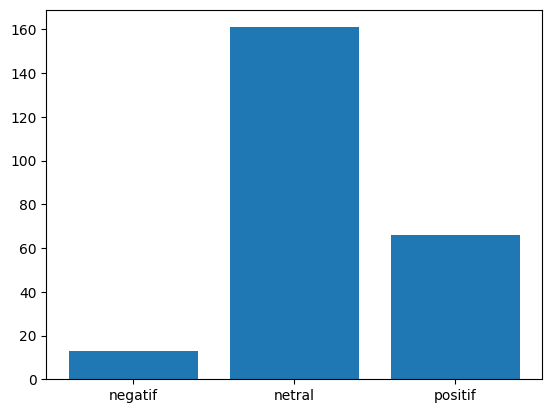

In [10]:
labels = merged_data.groupby('sentimen').count().index.values
values = merged_data.groupby('sentimen').size().values
plt.bar(labels, values)

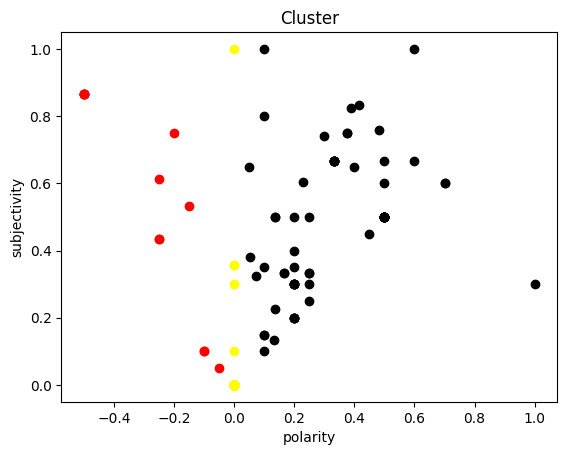

In [11]:
for index, row in merged_data.iterrows():
    if row['sentimen'] == 'positif':
        plt.scatter(row['polarity'], row['subjectivity'], color="black")
    elif row['sentimen'] == 'netral':
        plt.scatter(row['polarity'], row['subjectivity'], color="yellow")
    if row['sentimen'] == 'negatif':
        plt.scatter(row['polarity'], row['subjectivity'], color="red")
    
plt.title('Cluster')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [12]:
from sklearn.cluster import KMeans
# import sys
# from matplotlib import style
# style.use("ggplot")

In [13]:
nCluster = 3

In [14]:
x_array = np.array(merged_data.iloc[:,4:5])

In [15]:
print(x_array)

[[0.5       ]
 [0.25      ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.33333333]
 [0.3       ]
 [0.        ]
 [0.        ]
 [1.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.2       ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.83333333]
 [0.        ]
 [0.        ]
 [0.2       ]
 [0.75      ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.5       ]
 [0.5       ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.75      ]
 [0.32333333]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.3       ]
 [0.        ]
 [0.825     ]
 [0.5       ]
 [0.6       ]
 [0.6       ]
 [0.        ]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.        ]
 [0.5       ]
 [0.        ]
 [0.3       ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.5       ]
 [0.        ]
 [0.        ]
 [0.2       ]
 [0.        ]
 [0.66666667]
 [0.        ]
 [0.43

In [16]:
kmeans = KMeans(n_clusters=nCluster)
kmeans.fit(x_array)

KMeans(n_clusters=3)

In [17]:
merged_data['kluster'] = kmeans.labels_
merged_data

,Author,Review,preprocessing_result,polarity,subjectivity,sentimen,kluster
68,d*****i,"ada noda dikit but it's ok g msalah,trlepas dr...",ada noda dikit s ok g msalah trlepas dri itu ...,0.50,0.50,positif,2
151,elaadrea,Aerostreet emg ga ada duanya kualitas bagus ha...,aerostreet emg ga ada dua kualitas bagus harga...,0.25,0.25,positif,2
14,yogirifazhul,Ah mantap.. dah lama incer yang satu ini.. ker...,ah mantap dah lama incer yang satu ini keren...,0.00,0.00,netral,1
62,muhammadabrar046,Alhamdulilah barang nya sudah sampai dengan ba...,alhamdulilah barang nya sudah sampai dengan ba...,0.00,0.00,netral,1
33,o*****1,Alhamdulillah akhirnya datang juga sepatunya. ...,alhamdulillah akhir datang juga sepatu moga n...,0.00,0.00,netral,1
...,...,...,...,...,...,...,...
136,nooyaantul,Warna:Sesuai gambar\nTampilan:Bagus\n\nSebenar...,warna sesuai gambar tampil bagus benar ini s...,0.00,0.00,netral,1
238,nurfaisahnurfaisah539,Warna:sesuai gambar\nTampilan:baik\n\nBarangny...,warna sesuai gambar tampil baik barang sesua...,0.00,0.00,netral,1
110,fajar.sby,Warna:sesuai\nTampilan:oke\n\nbarang baik dan ...,warna sesuai tampil oke barang baik dan kual...,0.00,0.00,netral,1
79,kreshnayudogeovanin,WORTH IT \nPengiriman cepat ✔️\nHarga terjangk...,woh kirim cepat harga jangkau sesuai dengan ...,0.00,0.00,netral,1


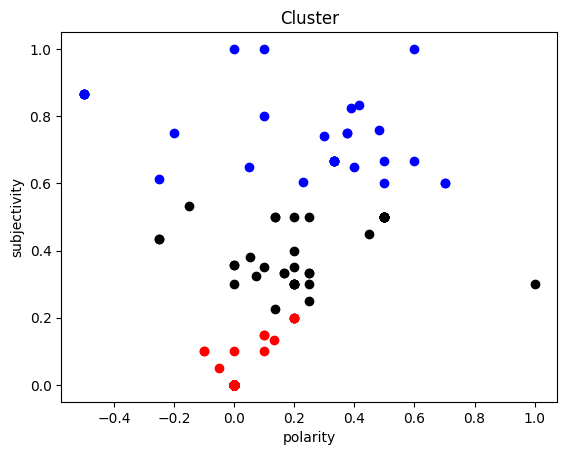

In [18]:
for index, row in merged_data.iterrows():
    if row['kluster'] == 0:
        plt.scatter(row['polarity'], row['subjectivity'], color="blue")
    elif row['kluster'] == 1:
        plt.scatter(row['polarity'], row['subjectivity'], color="red")
    elif row['kluster'] == 2:
        plt.scatter(row['polarity'], row['subjectivity'], color="black")
    
plt.title('Cluster')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.show()

In [19]:
centroids = kmeans.cluster_centers_
print(centroids)

[[0.7480722 ]
 [0.01001984]
 [0.40429152]]


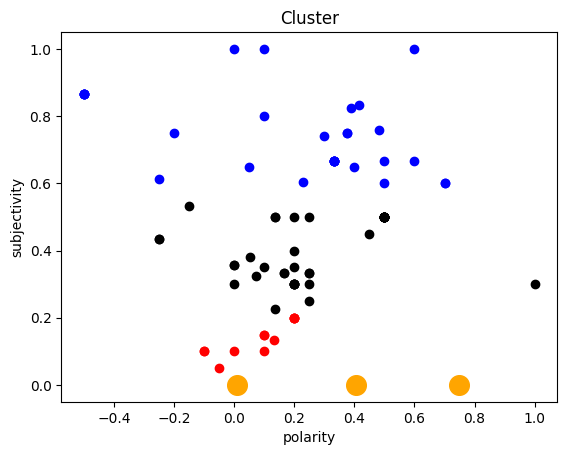

In [20]:
for index, row in merged_data.iterrows():
    if row['kluster'] == 0:
        plt.scatter(row['polarity'], row['subjectivity'], color="blue")
    elif row['kluster'] == 1:
        plt.scatter(row['polarity'], row['subjectivity'], color="red")
    elif row['kluster'] == 2:
        plt.scatter(row['polarity'], row['subjectivity'], color="black")
    
plt.title('Cluster')
plt.xlabel('polarity')
plt.ylabel('subjectivity')
plt.scatter(centroids, [0] * len(centroids), color='orange', s=200)
plt.show()

In [21]:
nama_file_excel = 'hasil cluster.xlsx'  # Nama file Excel yang diinginkan
merged_data.to_excel(nama_file_excel, index=False) 